In [1]:
# Install libraries :
!pip3 install --user --upgrade pip
!pip3 install --user scipy matplotlib matplotlib2tikz torch
!pip3 install --user git+git://github.com/veeresht/CommPy.git@master
print("================== DONE ! ==================")

Requirement already up-to-date: pip in /home/eric/.local/lib/python3.6/site-packages (19.1.1)
  Cloning git://github.com/veeresht/CommPy.git (to revision master) to /tmp/pip-req-build-iid8_a66
  Running command git clone -q git://github.com/veeresht/CommPy.git /tmp/pip-req-build-iid8_a66
  Stored in directory: /tmp/pip-ephem-wheel-cache-rl3kb5hw/wheels/d1/6a/31/8ddc70e8eb8a1c3ad344032ed43b4ebfccc41007e8850226d0
Successfully built scikit-commpy
================== DONE ! ==================


In [1]:
## To modify the code while running the notebook whitout any restart
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function

# Numpy
import numpy as np
np.set_printoptions(precision=2)

# For DL libraries 
import torch
import torch.nn as nn
import torch.nn.functional as F

# Set the use of device which will be used 
if torch.cuda.is_available():
    device = torch.device('cuda')
    FloatTensor = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')
    FloatTensor = torch.FloatTensor

0.5
Results will be printed in :  ./results/OFDM_eq_MMSE_coding_0.5_AWGN_non_lin_coeff_0.5_iq_im_0.5_freq_update_200_snr_10_time_step_1000_pre_equalizer_update_202_ser_sim.pickle
New parameter gamma is  0.5 beta is  0.6  at t =  0
At  0.0  % , SER =  0.0  for  Eb/N0 =  10  dB , SNR =  10.0 dB  at time step 0
At  10.0  % , SER =  0.0  for  Eb/N0 =  10  dB , SNR =  10.0 dB  at time step 100
New parameter gamma is  0.5 beta is  0.45  at t =  200
At  20.0  % , SER =  0.0009746588693957114  for  Eb/N0 =  10  dB , SNR =  10.0 dB  at time step 200
At  30.0  % , SER =  0.20175438596491227  for  Eb/N0 =  10  dB , SNR =  10.0 dB  at time step 300
New parameter gamma is  0.5 beta is  0.55  at t =  400
At  40.0  % , SER =  0.2134502923976608  for  Eb/N0 =  10  dB , SNR =  10.0 dB  at time step 400
At  50.0  % , SER =  0.16666666666666666  for  Eb/N0 =  10  dB , SNR =  10.0 dB  at time step 500
New parameter gamma is  0.5 beta is  0.45  at t =  600
At  60.0  % , SER =  0.14912280701754385  for  Eb/

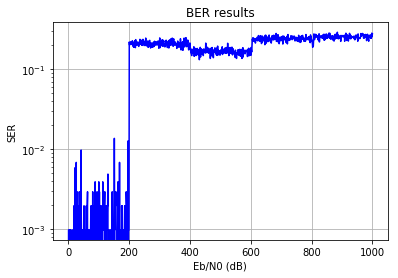

In [26]:
### Launch simulation
from MonteCarlo import *

# Select the model
model_path = "./models/pre_eq_model.pth"

# Define the parameter dictionary
simulation_ser_param_dict = {
    "sim_parameters": {
        "nb_frame": 100, # Number of error frame used for each time step
        "eb_n0_db": 10, # Eb/N0 chosen for the performances testing
        "nb_time_step": 1000, # Number of time step used for the simulation
    },
    "channel_parameters": {
        "channel_type": "AWGN", # String to indicate the type of channel that is used
        "non_lin_coeff": 0.5, # Value of the non-linearity coefficient
        "non_lin_coeff_set": np.array([0.5]),
        "iq_imbalance": 0.5, # Values of the IQ-imbalance None, 0.5
        "iq_imbalance_set": np.array([0.4, 0.45, 0.5, 0.55, 0.6]), #np.array([None])
        "chan_param_freq_update": 200, # Update frequency of the iq_imbalance and non-linear coefficient (ie. counter of
            # OFDM symbols send)
        "channel_taps": np.array([1]),
        # Value of the channel taps for the simulation (np.array([1]) can be used if we want to only test AWGN)
    },
    "frame_length": 1024,#32768,#16384,#,8192,#4096,#2048,#1024, # Frame size (don"t change the value, it was set to fit the article's parameters)
    "modulation": {
        "modulation_order": 4, # Modulation order (PSK moduation)
        "nb_carriers": 64, # Number of OFDM carriers used for modulation
        "cp_length": 8, # Size of the Cyclic Prefix for the OFDM system
        "off_carrier": 0, # Number of off-carriers for the simualtion
    },
    "equalizer":"MMSE", # Type of equalizer used (None, ZF, MMSE)
    "channel_coding": { # Parameters for the channel coding part (Handle by CommPy library)
        "mem_size": np.array([2]), # Size of the memory for the channel coding (put it to None if no channel coding)
        "g_matrix": np.array([[0o5, 0o7]]), # Value of the generator polynomial in octal domain (put it to None if no channel coding)
        "rho": 1 / 2, #Coding rate (put 0 if we don't want to use channel coding)
    },
    "pre_equalizer": {
        "model_path": model_path, # None if no trained model is used.
        "feed_back_freq": 202, # Can be used at a certain frequency.
    }
}

# Launch the simulation
feedback_update_simulation(simulation_ser_param_dict, add_on_path="ser_sim")